https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [26]:
import pandas as pd

In [27]:
temps_df = pd.read_csv("./data/temps.csv")
temps_df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42


### 2. Lidia con las variables categóricas del dataset

In [28]:
temps_df = pd.get_dummies(temps_df)

In [29]:
import seaborn as sns
%matplotlib inline

#sns.pairplot(temps_df.iloc[:,1:7])

In [30]:
#sns.pairplot(temps_df.iloc[:,6:11])

In [31]:
#Tenemos correlación lineal entre las variables y el target, así como multicolinealidad.
#Parece que un modelo de regresión lineal con una transformación de grado 2 podría funcionar bien. 
#Pero: ¿Qué tendríamos que hacer antes de implementar el modelo?
#-estandarizar
#-descartar variables por multicolinealidad

#Si implementaramos una regresión lineal, tendríamos que descartar variables por multicolinealidad.
#Para implementar un arbol de decisión no lo necesitamos.

### 3. Divide en train y test

In [32]:
X = temps_df.drop(columns=["actual"])
y = temps_df["actual"]

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.25, random_state = 42)

X.shape
X_train.shape
X_test.shape

(87, 17)

In [34]:
X_train.columns

Index(['year', 'month', 'day', 'temp_2', 'temp_1', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'week_Fri', 'week_Mon',
       'week_Sat', 'week_Sun', 'week_Thurs', 'week_Tues', 'week_Wed'],
      dtype='object')

### 4. Entrena el modelo
Utiliza un DecisionTreeRegressor

In [35]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

tree_reg.fit(X_train,y_train) 

DecisionTreeRegressor()

### 5. Calcula su MAE
Sin usar sklearn

In [36]:
import numpy as np

# 1. MAE de train

# Predecimos
predictions = tree_reg.predict(X_train)
#Calculamos el valor absoluto
errors = np.abs(y_train - predictions)
errors
#sacamos la media de los errores
#mean_errors = errors.mean()
print('Mean Absolute Error en train:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error en train: 0.0 degrees.


In [37]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_train, predictions)

#sklearn.metrics.mean_absolute_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')[source]¶

0.0

In [38]:
# 2. MAE de test

# Predecimos
predictions = tree_reg.predict(X_test)
#Calculamos el valor absoluto
errors = np.abs(predictions - y_test)
#sacamos la media de los errores
#mean_errors = errors.mean()
print('Mean Absolute Error en test:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error en test: 5.37 degrees.


In [39]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, predictions)

5.367816091954023

### 6. Calcula su MAPE
Sin usar sklearn

In [40]:
# 1. MAPE test

mape = 100 * (errors / y_test)
print("MAPE", round(np.mean(mape), 2), "%")

MAPE 8.38 %


In [41]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test, predictions)

0.08383016233623096

### 7. Representa el árbol de decision

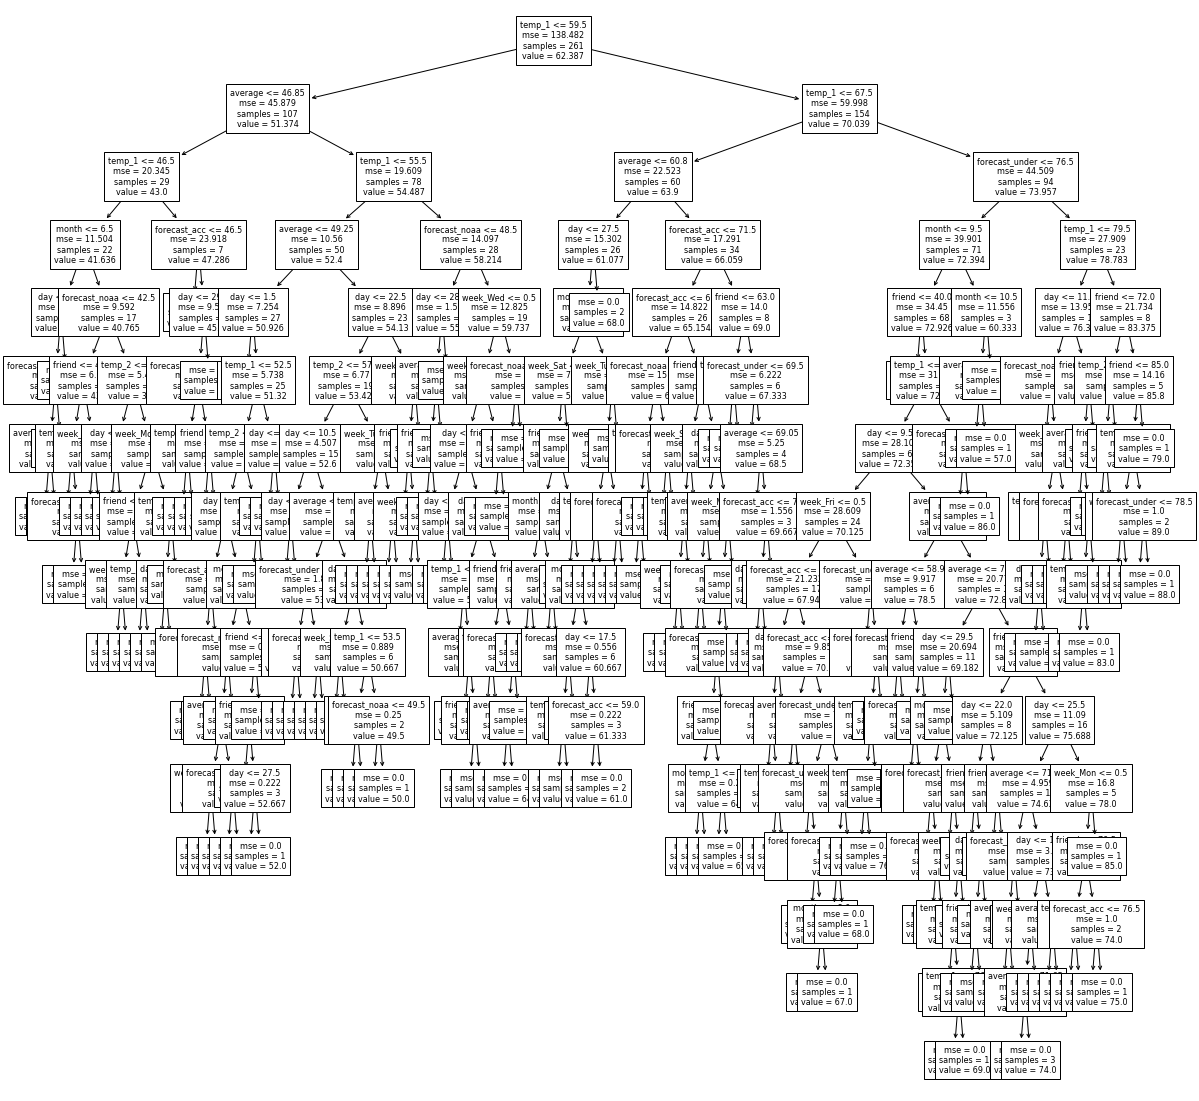

In [42]:
import matplotlib.pyplot as plt
import sklearn

plt.figure(figsize=(20,20))

sklearn.tree.plot_tree(tree_reg,
               feature_names= X.columns,
               class_names="actual",
               fontsize = 8);

### 8. Modifica el max_depth a 3 y vuelve a entrenarlo

In [43]:
tree_reg_lim = DecisionTreeRegressor(max_depth = 3, random_state = 42)#limitamos las bifurcaciones a 3 con el parámetro max depth

tree_reg_lim.fit(X_train,y_train) 

DecisionTreeRegressor(max_depth=3, random_state=42)

### 9. Vuelve a calcular su MAE

In [44]:
#1 MAE de train

predictions = tree_reg_lim.predict(X_train)
mean_absolute_error(y_train, predictions)

3.6640849571746177

In [45]:
# 2. MAE de test

# Predecimos
predictions = tree_reg_lim.predict(X_test)
#Calculamos el valor absoluto
errors = np.abs(predictions - y_test)
#sacamos la media de los errores
#mean_errors = errors.mean()
print('Mean Absolute Error en test:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error en test: 4.41 degrees.


In [46]:
predictions = tree_reg_lim.predict(X_test)

mean_absolute_error(y_test, predictions)

4.411345837873503

### 10. Vuelve a representar su árbol

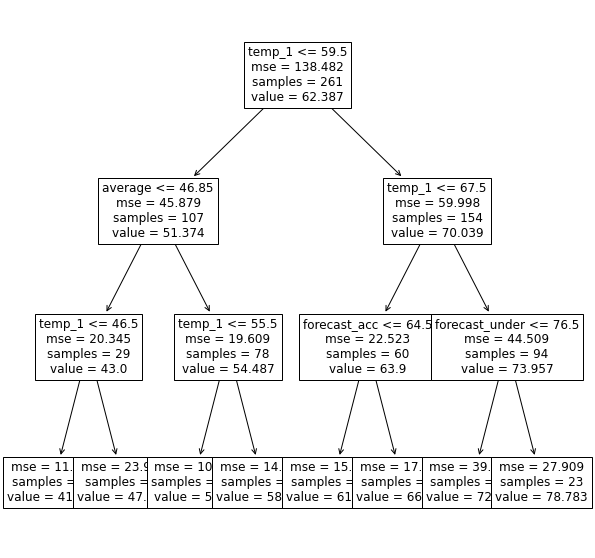

In [47]:
import matplotlib.pyplot as plt
import sklearn

plt.figure(figsize=(10,10))

sklearn.tree.plot_tree(tree_reg_lim,
               feature_names= X.columns,
               class_names="actual",
               fontsize = 12);

### 10. Obten el `feature_importances` de cada variable en el último modelo

In [48]:
importance = tree_reg_lim.feature_importances_
importance

array([0.        , 0.        , 0.        , 0.        , 0.87263746,
       0.09194304, 0.        , 0.01205242, 0.02336708, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [49]:
importance_df = pd.DataFrame(importance, 
                             index = X.columns,
                            columns = ["Importances"]).sort_values('Importances', ascending=False)
importance_df 

,Importances
temp_1,0.872637
average,0.091943
forecast_under,0.023367
forecast_acc,0.012052
week_Fri,0.000000
week_Tues,0.000000
week_Thurs,0.000000
week_Sun,0.000000
week_Sat,0.000000
week_Mon,0.000000
